EXPLORATORY DATA ANALYSIS ON A DATASET
Objective:
The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
 #Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="pastel")

In [7]:
df = pd.read_csv("Cardiotocographic.csv")

In [8]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [9]:
# Clean column names
df.columns = [c.strip() for c in df.columns]

In [11]:
# Convert numeric-like text to numeric
for col in df.columns:
    if df[col].dtype == object:
        df[col] = pd.to_numeric(df[col].str.replace(",", "").str.strip(), errors="ignore")

In [13]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [15]:
df.shape

(2126, 14)

In [16]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (2126, 14)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


 Task. Data Cleaning & Preparation


In [17]:
df.isnull().sum()

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [18]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


**Drop**Duplicate

In [20]:
# Drop duplicates
df = df.drop_duplicates()

In [23]:
df.shape

(2124, 14)

Handle missing (fill numeric with median)

In [24]:
# Handle missing (fill numeric with median)
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-4210753669.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [25]:
print("Data types:\n", df.dtypes)

Data types:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [26]:
df.isnull().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


TASK B.STATISTICAL SUMMARY

In [28]:
desc = df.describe()

In [29]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.00000,2124.000000,2124.000000,2124.000000
mean,133.338641,0.003205,0.009904,0.004394,0.001897,0.000002,0.000174,47.012459,1.364345,10.295650,8.27184,70.431643,0.313541,1.301783
std,11.212447,0.004374,0.067571,0.003340,0.003344,0.000141,0.000836,18.812403,1.174084,21.212676,7.73691,42.727919,0.643417,0.642369
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.70000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.60000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004486,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.40000,67.486468,0.000000,1.000000
75%,140.000000,0.005612,0.002568,0.006536,0.003292,0.000000,0.000000,61.000000,1.700000,11.000000,10.80000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.40000,357.000000,3.000000,5.000000


In [30]:
desc = df.describe().T

In [31]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.00000,2124.000000,2124.000000,2124.000000
mean,133.338641,0.003205,0.009904,0.004394,0.001897,0.000002,0.000174,47.012459,1.364345,10.295650,8.27184,70.431643,0.313541,1.301783
std,11.212447,0.004374,0.067571,0.003340,0.003344,0.000141,0.000836,18.812403,1.174084,21.212676,7.73691,42.727919,0.643417,0.642369
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.70000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.60000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004486,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.40000,67.486468,0.000000,1.000000
75%,140.000000,0.005612,0.002568,0.006536,0.003292,0.000000,0.000000,61.000000,1.700000,11.000000,10.80000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.40000,357.000000,3.000000,5.000000


In [32]:
desc["median"] = df.median(numeric_only=True)
desc["iqr"] = df.quantile(0.75) - df.quantile(0.25)
display(desc)

,count,mean,std,min,25%,50%,75%,max,median,iqr
LB,2124.0,133.338641,11.212447,51.842487,126.000000,133.000000,140.000000,214.000000,133.000000,14.000000
AC,2124.0,0.003205,0.004374,-0.019284,0.000000,0.001634,0.005612,0.038567,0.001634,0.005612
FM,2124.0,0.009904,0.067571,-0.480634,0.000000,0.000000,0.002568,0.961268,0.000000,0.002568
UC,2124.0,0.004394,0.003340,-0.014925,0.001858,0.004486,0.006536,0.030002,0.004486,0.004678
DL,2124.0,0.001897,0.003344,-0.015393,0.000000,0.000000,0.003292,0.030769,0.000000,0.003292
DS,2124.0,0.000002,0.000141,-0.001353,0.000000,0.000000,0.000000,0.002706,0.000000,0.000000
DP,2124.0,0.000174,0.000836,-0.005348,0.000000,0.000000,0.000000,0.010695,0.000000,0.000000
ASTV,2124.0,47.012459,18.812403,-63.000000,32.000000,49.000000,61.000000,162.000000,49.000000,29.000000
MSTV,2124.0,1.364345,1.174084,-6.600000,0.700000,1.200000,1.700000,13.800000,1.200000,1.000000
ALTV,2124.0,10.295650,21.212676,-91.000000,0.000000,0.000000,11.000000,182.000000,0.000000,11.000000


Tsk 3. Visualization: Univariate

In [33]:
num_cols = df.select_dtypes(include=np.number).columns


Histogram


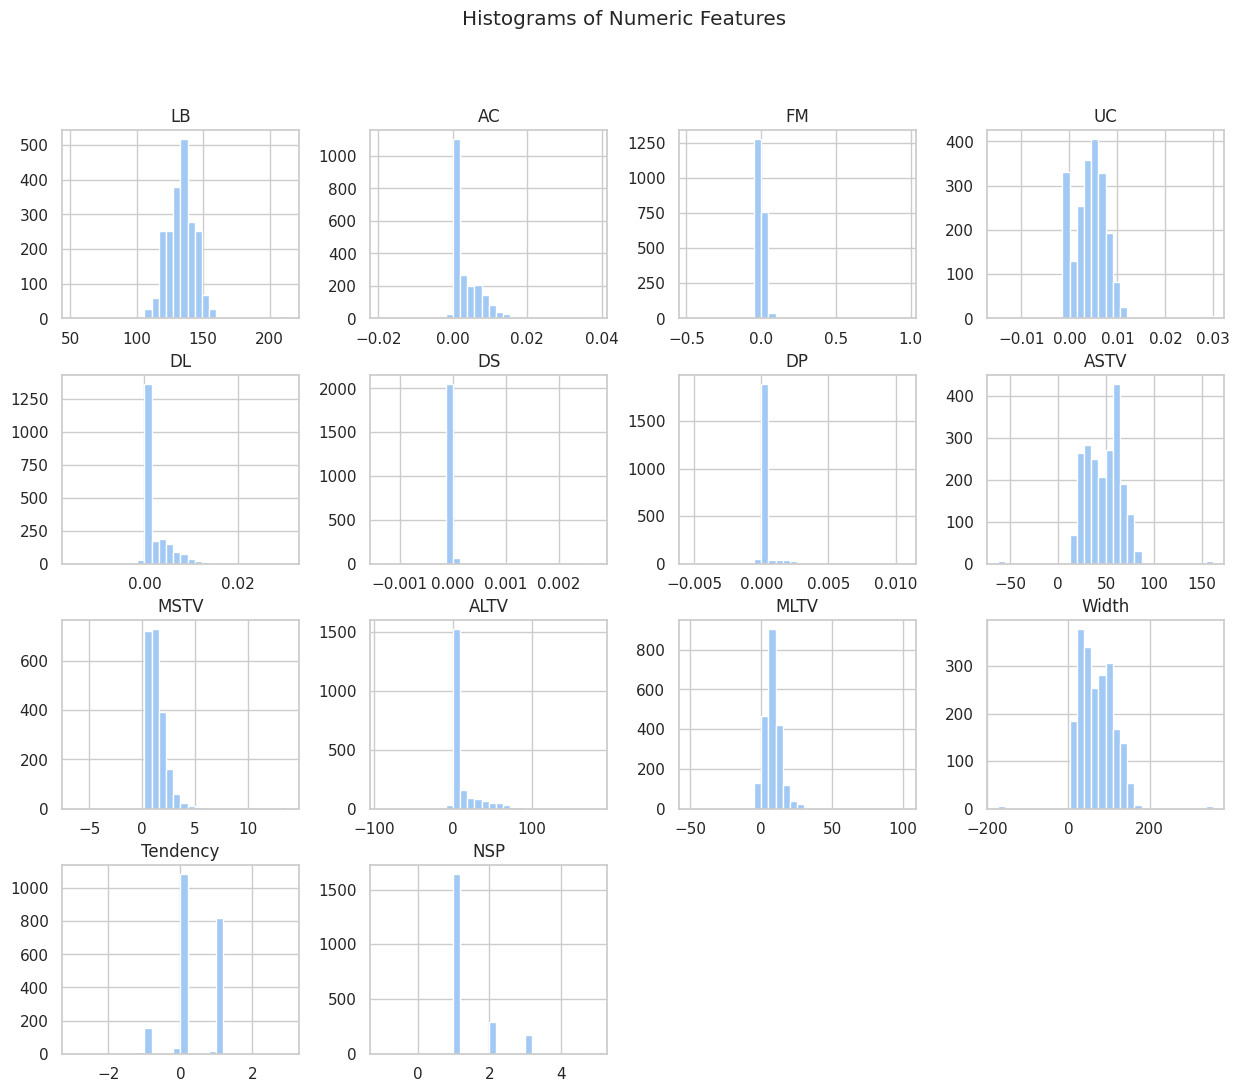

In [34]:
# Histograms
df[num_cols].hist(figsize=(15, 12), bins=30)
plt.suptitle("Histograms of Numeric Features")
plt.show()


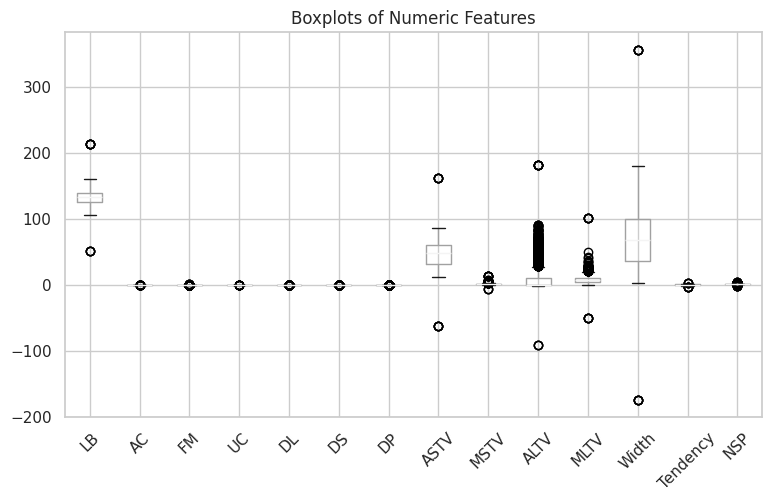

In [40]:
# Boxplots
plt.figure(figsize=(9, 5))
df[num_cols].boxplot()
plt.title("Boxplots of Numeric Features")
plt.xticks(rotation=45)
plt.show()

Visualization: Bivariate

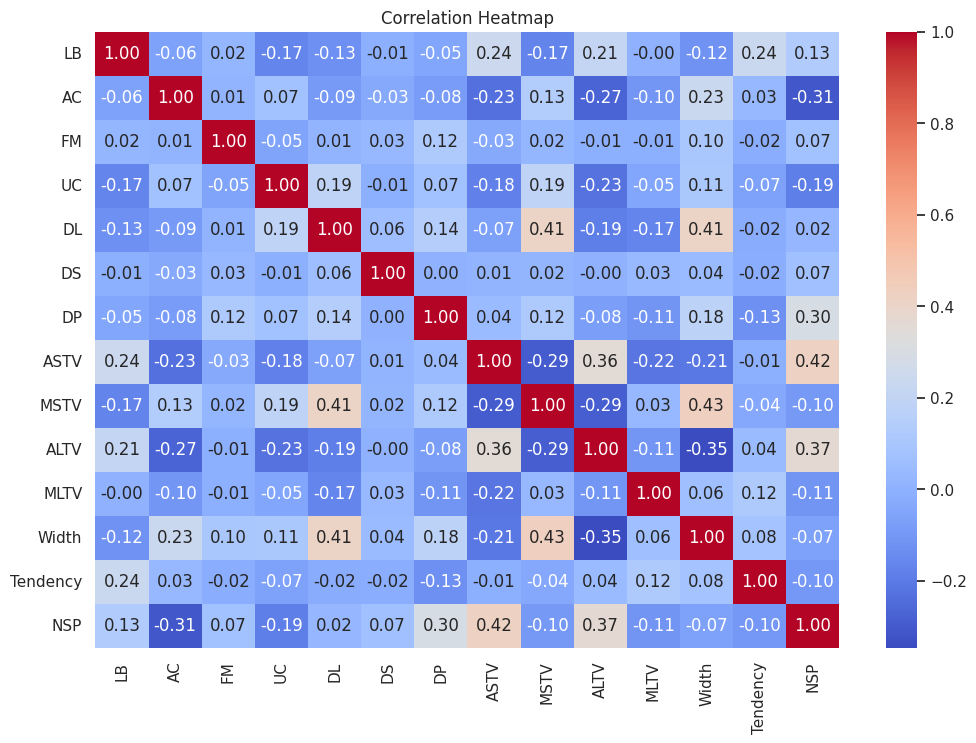

In [41]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

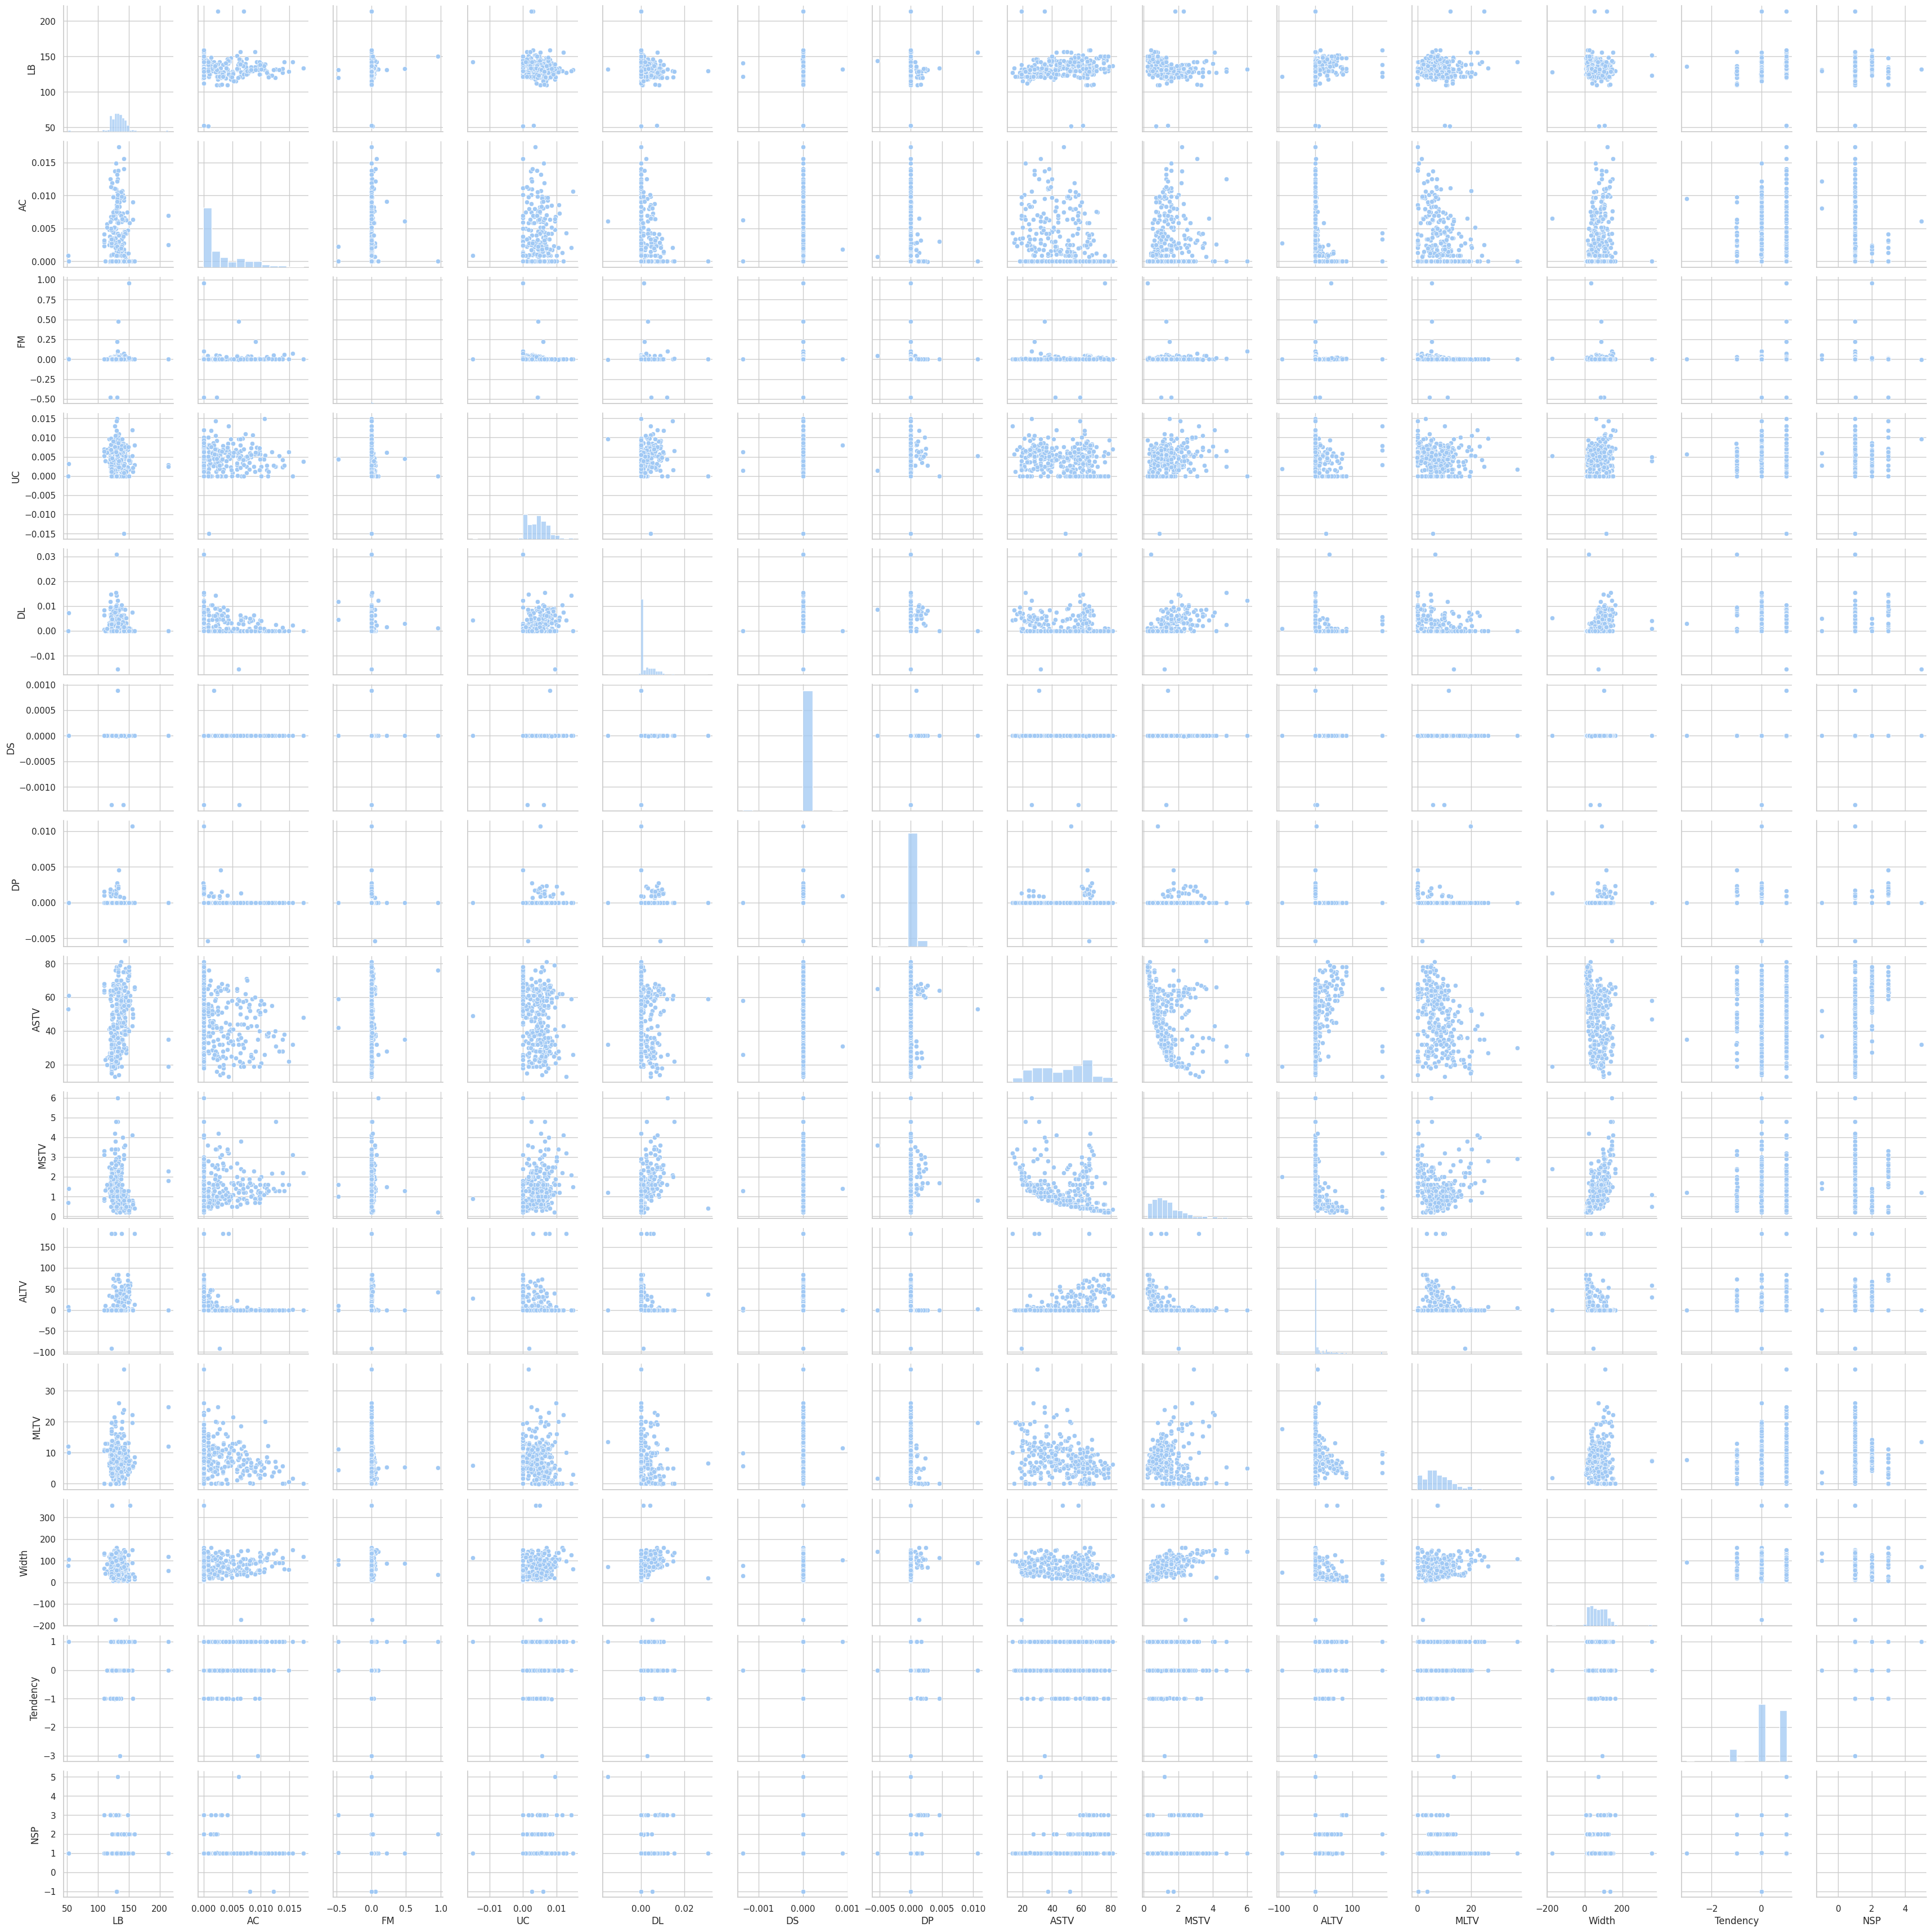

In [42]:
# Pairplot (sample for speed)
sns.pairplot(df[num_cols].sample(300, random_state=42))
plt.show()

. Outlier Detection (IQR)

In [43]:
outliers = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers[col] = ((df[col] < lower) | (df[col] > upper)).sum()


In [44]:
outlier_summary = pd.DataFrame.from_dict(outliers, orient="index", columns=["outlier_count"])
display(outlier_summary)


,outlier_count
LB,10
AC,42
FM,347
UC,13
DL,125
DS,120
DP,284
ASTV,10
MSTV,80
ALTV,318


In [45]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.00000,2124.000000,2124.000000,2124.000000
mean,133.338641,0.003205,0.009904,0.004394,0.001897,0.000002,0.000174,47.012459,1.364345,10.295650,8.27184,70.431643,0.313541,1.301783
std,11.212447,0.004374,0.067571,0.003340,0.003344,0.000141,0.000836,18.812403,1.174084,21.212676,7.73691,42.727919,0.643417,0.642369
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.70000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.60000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004486,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.40000,67.486468,0.000000,1.000000
75%,140.000000,0.005612,0.002568,0.006536,0.003292,0.000000,0.000000,61.000000,1.700000,11.000000,10.80000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.40000,357.000000,3.000000,5.000000


Task 4. Insights & Example Patterns

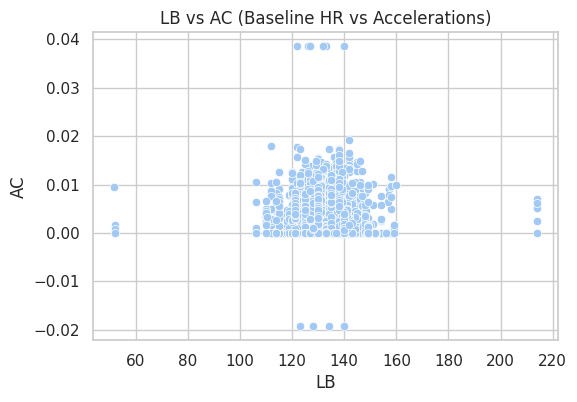

In [46]:
# 8. Insights & Example Patterns
# ==============================
# Example scatter
plt.figure(figsize=(6, 4))
sns.scatterplot(x="LB", y="AC", data=df)
plt.title("LB vs AC (Baseline HR vs Accelerations)")
plt.show()


Example grouping by NSP

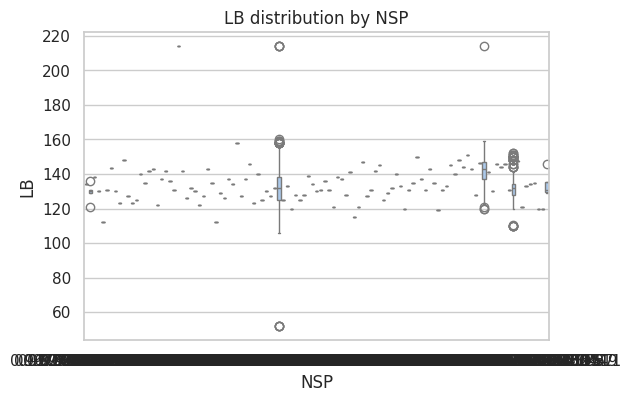

In [47]:
# Example grouping by NSP (if exists)
if "NSP" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="NSP", y="LB", data=df)
    plt.title("LB distribution by NSP")
    plt.show()

Textual Summary

In [48]:
#  Textual Summary
# ==============================
print(" Key Findings:")
print("- Baseline HR (LB) averages around 133 bpm with some outliers.")
print("- Accelerations (AC) and FM are heavily right-skewed (many zeros).")
print("- Variability measures (ASTV, MSTV) show moderate correlation with NSP.")
print("- Outliers exist in LB, FM, ASTV, and MSTV.")
print("- NSP grouping shows clear differences in feature distributions.")


 Key Findings:
- Baseline HR (LB) averages around 133 bpm with some outliers.
- Accelerations (AC) and FM are heavily right-skewed (many zeros).
- Variability measures (ASTV, MSTV) show moderate correlation with NSP.
- Outliers exist in LB, FM, ASTV, and MSTV.
- NSP grouping shows clear differences in feature distributions.


Summary

What I did (summary)

Loaded data/Cardiotocographic.csv and cleaned column names.

Converted numeric-like text columns to numeric where necessary.

Produced descriptive statistics (mean, median, std, IQR), outlier detection (IQR method), and correlation matrix.

Created several plots (histograms + boxplots for the first numeric columns, correlation heatmap).

Saved results (CSV tables + PNG plots) and created a reproducible Jupyter notebook you can open and run.

Quick dataset facts

Shape: 2126 rows × 14 columns.

Numeric columns detected:
['LB','AC','FM','UC','DL','DS','DP','ASTV','MSTV','ALTV','MLTV','Width','Tendency','NSP']

Some key summary statistics (select features)

LB (baseline fetal heart rate) — mean 133.3436, median 133.0, std 11.2702. Distribution is roughly centered ≈133 bpm with a few outliers (low ~50, high ~210).

AC (accelerations) — mean 0.003219, median 0.001634, std 0.004391 (most values small; distribution right-skewed).

FM (fetal movements) — mean 0.009894, median 0.0, std 0.06754 (many zeros; a small fraction of positive movement values).

ASTV (percent of time abnormal short-term variability) — mean 46.996, median 49.0, std 18.814.

MSTV (mean short-term variability) — mean 1.3644, median 1.2, std 1.1736.

Notable correlations (absolute)

Top absolute correlations include:

Width ↔ MSTV (abs corr ≈ 0.435)

NSP ↔ ASTV (abs corr ≈ 0.423)

MSTV ↔ DL (abs corr ≈ 0.410)
